My wife and I welcomed our first child a few months ago. The choices/decisions we make in our parenting mostly come down to gut intuition or just the help from typing and clicking away on Google. For instance, our child's carseat is currently positioned in the middle of the backseat of our vehicle. But with the rate he is growing, it is becoming increasingly difficult to get him in/out of the middle position and a change is needed yesterday. 

***So, the question is: what side of the back row is the safest for the car seat - driver side or passenger side?*** We asked our doctor and she mentioned she puts hers on the driver side because less distance to access the baby once exiting the vehicle. My wife and I seeked to Google. After a little research, the consensus I found was the driver side was safer. After my wife's research, the consensus she found was that the passenger side was safer. What is this madness?

This is what lead me here. I decided I wanted to gather the necessary data to see if I can reach any conclusion that supports whether there is a side of the vehicle that is safer to put our childs car seat. Let's get to it.

## The Data

The data used in this analysis was extracted from the Texas Department of Transportation - Crash Records Information System. One has the option to extract all public crash report data from the state of Texas in certain time frames in CSV format. For this study, I extracted all crash data from 2017 and 2018 in Texas.

The amount of data that is extracted for each incident is vast. Information on the people involved, vehicle damages, crash setting and environment, crash location, etc is included in the dataset. For this analysis, I was looking for the location on the vehicle that had primary impact/damage. Thankfully, this information was provided in the form of 'Damage Area ID'. Each ID correlated to a location description (i.e. Front End Damage Concentrated, Left Front Quarter Damage, etc). An image of this is shown further down in the notebook. This was the specific data needed for this study.

In [6]:
#Import Libraries for study
import pandas as pd
import glob
import os

## Import Crash Data and Create DataFrame

In [2]:
os.chdir('D:\crashdata\crashdatacombo')
filelist = glob.glob('*.csv')
print(filelist)

['crash_unit_20170101-20170302.csv', 'crash_unit_20170303-20170427.csv', 'crash_unit_20170428-20170624.csv', 'crash_unit_20170625-20170825.csv', 'crash_unit_20170826-20171022.csv', 'crash_unit_20171023-20171201.csv', 'crash_unit_20180201-20180329.csv', 'crash_unit_20180330-20180524.csv', 'crash_unit_20180525-20180724.csv', 'crash_unit_20180725-20180920.csv', 'crash_unit_20180921-20181101.csv']


In [12]:
#Create dataframe and compile into one
alldata = pd.DataFrame()
for file in filelist:
    df2 = pd.read_csv(file)
    alldata = alldata.append(df2,ignore_index=True, sort = True)
     

In [13]:
#How many crash incidents does the data contain?
print("The total number of incidents contained in the crash data is: {}".format(alldata.shape[0])  ) 

The total number of incidents contained in the crash data is: 2093217


In [17]:
#What does the dataset look like?
alldata.head()


,CMV_Actual_Gross_Weight,Cmv_Bus_Type_ID,Cmv_Cargo_Body_ID,Cmv_Carrier_ID_Type_ID,Cmv_Carrier_Zip,Cmv_Disabling_Damage_Fl,Cmv_Evnt1_ID,Cmv_Evnt2_ID,Cmv_Evnt3_ID,Cmv_Evnt4_ID,...,Veh_HNR_Fl,Veh_Inventoried_Fl,Veh_Lic_State_ID,Veh_Make_ID,Veh_Mod_ID,Veh_Mod_Year,Veh_Parked_Fl,Veh_Transp_Dest,Veh_Transp_Name,Veh_Trvl_Dir_ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,43.0,107.0,658.0,2015.0,N,BY OPERATOR,DRIVEN AWAY,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,43.0,45.0,1107.0,2013.0,N,BY OWNER,DRIVEN AWAY,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,43.0,107.0,300.0,2000.0,N,11615 RAILROAD,BEST WRECKER,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,43.0,107.0,53.0,2004.0,N,NaN,NaN,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,43.0,37.0,2324.0,2004.0,N,NaN,NaN,6.0


**As you can see above, the dataset contains 82 columns of data. Let's look at those columns**

In [18]:
alldata.columns

Index(['CMV_Actual_Gross_Weight', 'Cmv_Bus_Type_ID', 'Cmv_Cargo_Body_ID',
       'Cmv_Carrier_ID_Type_ID', 'Cmv_Carrier_Zip', 'Cmv_Disabling_Damage_Fl',
       'Cmv_Evnt1_ID', 'Cmv_Evnt2_ID', 'Cmv_Evnt3_ID', 'Cmv_Evnt4_ID',
       'Cmv_Fiveton_Fl', 'Cmv_GVWR', 'Cmv_Hazmat_Fl', 'Cmv_Hazmat_Rel_Fl',
       'Cmv_Intermodal_Container_Permit_Fl', 'Cmv_Nine_Plus_Pass_Fl',
       'Cmv_RGVW', 'Cmv_Tot_Axle', 'Cmv_Tot_Tire',
       'Cmv_Trlr1_Disabling_Dmag_ID', 'Cmv_Trlr2_Disabling_Dmag_ID',
       'Cmv_Veh_Oper_ID', 'Cmv_Veh_Type_ID', 'Contrib_Factr_1_ID',
       'Contrib_Factr_2_ID', 'Contrib_Factr_3_ID', 'Contrib_Factr_P1_ID',
       'Contrib_Factr_P2_ID', 'Crash_ID', 'Death_Cnt', 'Emer_Respndr_Fl',
       'Fin_Resp_Proof_ID', 'Fin_Resp_Type_ID', 'First_Harm_Evt_Inv_ID',
       'Force_Dir_1_ID', 'Force_Dir_2_ID', 'Hazmat_Cls_1_ID',
       'Hazmat_Cls_2_ID', 'Hazmat_IDNbr_1_ID', 'Hazmat_IDNbr_2_ID',
       'Non_Injry_Cnt', 'Nonincap_Injry_Cnt', 'Ownr_Zip', 'Poss_Injry_Cnt',
       'Sus_Serio

**For this study, we just need the 'Veh_Dmag_Area_1_ID', which represents the primary location of the vehicle that was impacted/damaged**

In [19]:
#Lets create a subset of the alldata dataset, which only includes Crash ID and 'Veh_Dmag_Area_1_ID'
cleaned_df = alldata[['Crash_ID','Veh_Dmag_Area_1_ID']]

In [21]:
cleaned_df.head()

,Crash_ID,Veh_Dmag_Area_1_ID
0,14881309,8.0
1,14881309,2.0
2,15316938,2.0
3,15504579,13.0
4,15504579,4.0


In [23]:
#add empty column that will represent the location of the vehicle that was damaged
cleaned_df['damage_area']= ''
cleaned_df.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Crash_ID,Veh_Dmag_Area_1_ID,damage_area
0,14881309,8.0,
1,14881309,2.0,
2,15316938,2.0,
3,15504579,13.0,
4,15504579,4.0,


---------------------------------------------------------------
**The image below shows the location description of vehicle damage and what ID is associated with that description**

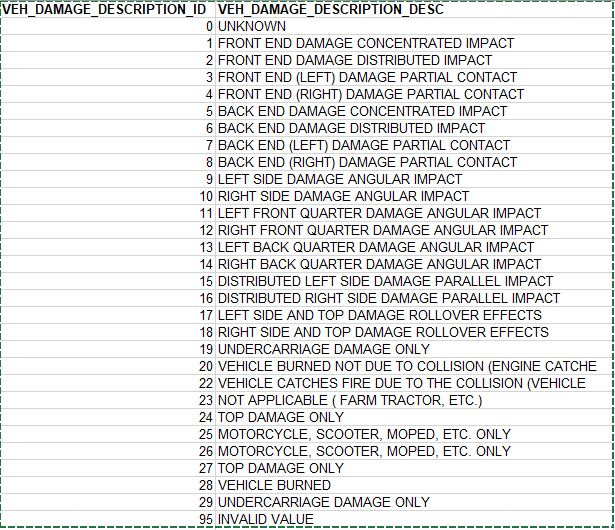

**Please refer to the image above that explains how the ID's are correlated to the damage area. For this study, I am simplifying and combining the areas of the vehicle into 8 categories(front, front right, front left, right, back, back left, back right, and left)**

**The image above shows 29 categories. The ID's of 19-29, 95 were not included in this study as they were not applicable. Some categories were merged into one of the simplied categories (i.e. 'Back end damage concentrated' AND 'Back end damage distributed' were merged into 'Back').**

In [24]:
#Fill 'Damage_Area' column with new merged damage locations
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 1.0, 'damage_area'] = 'front'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 2.0, 'damage_area'] = 'front'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 3.0, 'damage_area'] = 'front left'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 4.0, 'damage_area'] = 'front right'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 5.0, 'damage_area'] = 'back'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 6.0, 'damage_area'] = 'back'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 7.0, 'damage_area'] = 'back left'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 8.0, 'damage_area'] = 'back right'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 9.0, 'damage_area'] = 'left'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 10.0, 'damage_area'] = 'right'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 11.0, 'damage_area'] = 'front left'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 12.0, 'damage_area'] = 'front right'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 13.0, 'damage_area'] = 'back left'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 14.0, 'damage_area'] = 'back right'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 15.0, 'damage_area'] = 'left'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 16.0, 'damage_area'] = 'right'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 17.0, 'damage_area'] = 'left'
cleaned_df.loc[cleaned_df['Veh_Dmag_Area_1_ID'] == 18.0, 'damage_area'] = 'right'

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
cleaned_df.head()

,Crash_ID,Veh_Dmag_Area_1_ID,damage_area
0,14881309,8.0,back right
1,14881309,2.0,front
2,15316938,2.0,front
3,15504579,13.0,back left
4,15504579,4.0,front right


**Next, I want to add another column that gives each damage area an angle. This will be useful for plotting.**

In [28]:
#add empty column of damage_angle
cleaned_df['damage_angle'] = ''

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
cleaned_df.loc[cleaned_df['damage_area'] == 'front', 'damage_angle'] = 0
cleaned_df.loc[cleaned_df['damage_area'] == 'front left', 'damage_angle'] = 320
cleaned_df.loc[cleaned_df['damage_area'] == 'front right', 'damage_angle'] = 40
cleaned_df.loc[cleaned_df['damage_area'] == 'back', 'damage_angle'] = 180
cleaned_df.loc[cleaned_df['damage_area'] == 'back left', 'damage_angle'] = 220
cleaned_df.loc[cleaned_df['damage_area'] == 'back right', 'damage_angle'] = 140
cleaned_df.loc[cleaned_df['damage_area'] == 'left', 'damage_angle'] = 270
cleaned_df.loc[cleaned_df['damage_area'] == 'right', 'damage_angle'] = 90

Of the 2,093,217 total incidents, how many will be used in this analysis?

In [101]:
x = cleaned_df['damage_area'].count()
print("The number of incidents being used in this analysis is: {}".format(x))

The number of incidents being used in this analysis is: 1829243


In [80]:
cleaned_df = cleaned_df.replace(r'^\s*$', np.nan, regex=True)

In [81]:
cleaned_df.head()

,Crash_ID,Veh_Dmag_Area_1_ID,damage_area,damage_angle
0,14881309,8.0,back right,140.0
1,14881309,2.0,front,0.0
2,15316938,2.0,front,0.0
3,15504579,13.0,back left,220.0
4,15504579,4.0,front right,40.0


#### **Prep data for Visualization**

In [105]:
#compute the total count for each damage area
cleaned_df.damage_area.value_counts()

front          500783
back           270951
front left     266634
front right    262275
back left      138630
left           136889
right          134187
back right     118894
Name: damage_area, dtype: int64

In [86]:
#create list of the damage angles and the count of each, needed for plotting 
directions = [0,40,90,140,180,220,270,320]
frequency = [500783,262275,134187,118894,270951,138630,136889,266634]

import numpy as np
frequency_array = np.asarray(frequency)
directions_array = np.asarray(directions)
newdir = np.deg2rad(directions_array)

In [87]:
print(frequency_array)
print(directions_array)
print(newdir)

[500783 262275 134187 118894 270951 138630 136889 266634]
[  0  40  90 140 180 220 270 320]
[0.         0.6981317  1.57079633 2.44346095 3.14159265 3.83972435
 4.71238898 5.58505361]


## Results and Analysis

**First, I want to look at the results as if we are looking down at a vehicle. Thus, a polar bar chart is shown below.**

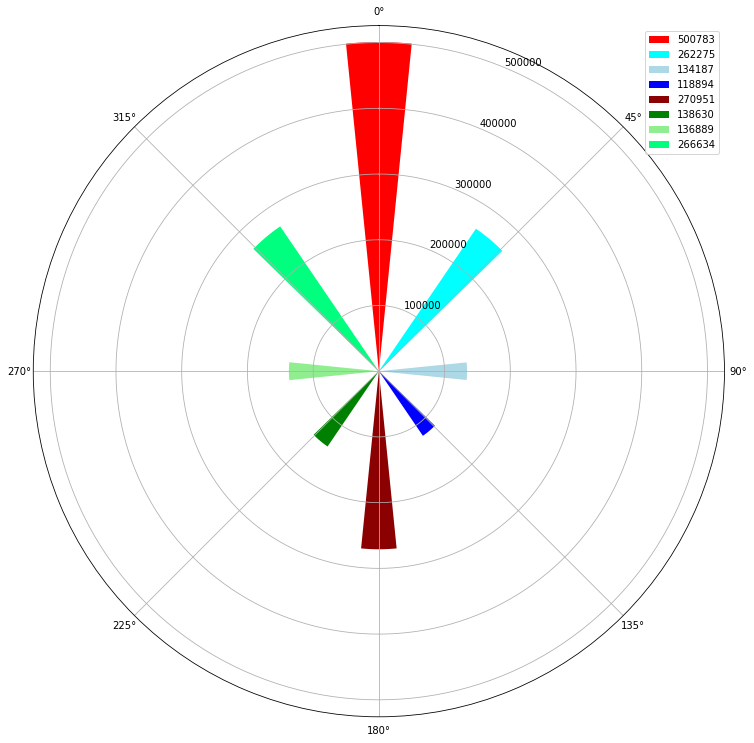

In [144]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc



fig = figure(figsize=(12,12))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
labels = frequency

bars = ax.bar(newdir,frequency_array, width=0.2, bottom=0.0, color = ['red','cyan','lightblue','blue','darkred','green','lightgreen','springgreen'])

ax.legend((bars[0], bars[1],bars[2], bars[3],bars[4],bars[5],bars[6],bars[7]), (frequency[0],frequency[1],frequency[2],frequency[3],frequency[4],frequency[5],frequency[6],frequency[7]) )
show()

In [125]:
#Getting count data ready for arithmetic
front_count = cleaned_df[(cleaned_df['damage_area'] == 'front')]
frontleft_count = cleaned_df[(cleaned_df['damage_area'] == 'front left')]
frontright_count = cleaned_df[(cleaned_df['damage_area'] == 'front right')]
back_count = cleaned_df[(cleaned_df['damage_area'] == 'back')]
backleft_count = cleaned_df[(cleaned_df['damage_area'] == 'back left')]
backright_count = cleaned_df[(cleaned_df['damage_area'] == 'back right')]
left_count = cleaned_df[(cleaned_df['damage_area'] == 'left')]
right_count = cleaned_df[(cleaned_df['damage_area'] == 'right')]

left_side_count = len(frontleft_count)+len(backleft_count)+len(left_count)
right_side_count = len(frontright_count)+len(backright_count)+len(right_count)

**What location of the vehicle had the most/least # of incidents?**

In [131]:
cleaned_df.damage_area.value_counts()

front          500783
back           270951
front left     266634
front right    262275
back left      138630
left           136889
right          134187
back right     118894
Name: damage_area, dtype: int64

The front of the vehicle was the most common area to be damaged, making up ~27.38% of the total incidents used in study. While the Back Right was the least common area, making up ~6.49% of the incidents.

**How many incidents had damage/impact on the left side of the vehicle versus the right side?**

In [135]:
left_side_count = len(frontleft_count)+len(backleft_count)+len(left_count)
right_side_count = len(frontright_count)+len(backright_count)+len(right_count)
print("# of Crashes with damage on Left side: {}".format(left))
print("# of Crashes with damage on Right side: {}".format(right))
print("There were {} more crashes that impacted/damaged the left side of vehicle versus right side in 2017 and 2018 combined".format(left_side_count - right_side_count))

# of Crashes with damage on Left side: 542153
# of Crashes with damage on Right side: 515356
There were 26797 more crashes that impacted/damaged the left side of vehicle versus right side in 2017 and 2018 combined


#### What percentage of incidents had damage/impact on the left side of vehicle versus the right side?

In [129]:
cleaned_df.damage_area.value_counts(normalize = True)

front          0.273765
back           0.148122
front left     0.145762
front right    0.143379
back left      0.075785
left           0.074834
right          0.073357
back right     0.064996
Name: damage_area, dtype: float64

In [145]:
left_perc = 0.145762+0.075785+0.074834
right_perc =0.143379+0.073357+0.064996
print("Percentage of Crashes with damage on Left side: {}%".format(left_perc*100))
print("Percentage of Crashes with damage on Right side: {}%".format(right_perc*100))

Percentage of Crashes with damage on Left side: 29.6381%
Percentage of Crashes with damage on Right side: 28.173199999999998%


### Discussion Points
1. **Verdict: The left side of the vehicle endured more primary damage/impact than the right side.**
2. Of the roughly 1.8 million crashes used in this analysis, the results show that from early 2017 to end of 2018, there were 26,797 more crashes that impacted/damaged the left side (29.64%) of the vehicle compared to the right side (28.17%).
3. Based on these results, there are ~1.052x more crashes that impact the left hand side of a vehicle compared to the right side.
4. Increasing the sample size by adding crash results from 2016 and earlier might alter the results and conclusions.